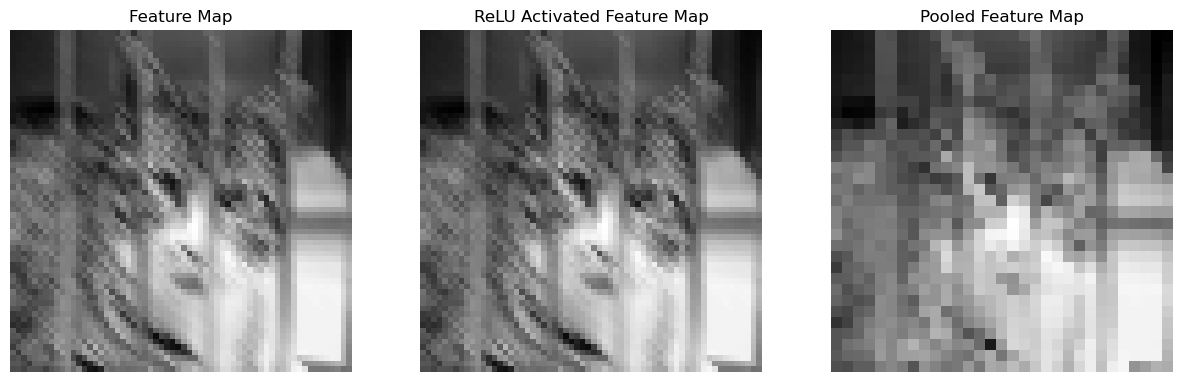

Original Feature Map Shape: (62, 62)
ReLU Feature Map Shape: (62, 62)
Pooled Feature Map Shape: (31, 31)
The pooling operation reduces size and retains dominant features.


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (64, 64)) 
    image = image.astype(np.float32) / 255.0 
    return image

image_path = "C:\\Users\\Dharani Ravi\\Pictures\\WhatsApp Image 2025-03-04 at 10.19.02_e1a2f258.jpg"  
image = load_image(image_path)

filter_3x3 = np.array([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 1]], dtype=np.float32)

kernel = filter_3x3.reshape(3, 3, 1, 1)

image_tensor = tf.convert_to_tensor(image.reshape(1, 64, 64, 1), dtype=tf.float32)
kernel_tensor = tf.convert_to_tensor(kernel, dtype=tf.float32)

feature_map = tf.nn.conv2d(image_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='VALID')

feature_map_relu = tf.nn.relu(feature_map)

pool_size = [1, 2, 2, 1]
strides = [1, 2, 2, 1]
feature_map_pooled = tf.nn.max_pool(feature_map_relu, ksize=pool_size, strides=strides, padding='VALID')

feature_map = feature_map.numpy().squeeze()
feature_map_relu = feature_map_relu.numpy().squeeze()
feature_map_pooled = feature_map_pooled.numpy().squeeze()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(feature_map_relu, cmap='gray')
plt.title("ReLU Activated Feature Map")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(feature_map_pooled, cmap='gray')
plt.title("Pooled Feature Map")
plt.axis("off")

plt.show()

print("Original Feature Map Shape:", feature_map.shape)
print("ReLU Feature Map Shape:", feature_map_relu.shape)
print("Pooled Feature Map Shape:", feature_map_pooled.shape)
print("The pooling operation reduces size and retains dominant features.")
